In [1]:
import sys
sys.path.append('../../../src/')

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from data_deep_dive.numerical_data_columns.utils import get_numerical_fields

In [17]:
numerical = get_numerical_fields()
numerical = numerical[numerical.field != 'O_SHIPPRIORITY']

2024-08-04 10:31:04,971 - data_deep_dive.numerical_data_columns.utils - INFO - Tables: ['REGION', 'NATION', 'PART', 'SUPPLIER', 'PARTSUPP', 'CUSTOMER', 'ORDERS', 'LINEITEM']
2024-08-04 10:31:04,983 - data_deep_dive.numerical_data_columns.utils - INFO - Numerical Fields: ['PART.P_SIZE', 'PART.P_RETAILPRICE', 'SUPPLIER.S_ACCTBAL', 'PARTSUPP.PS_AVAILQTY', 'PARTSUPP.PS_SUPPLYCOST', 'CUSTOMER.C_ACCTBAL', 'ORDERS.O_TOTALPRICE', 'ORDERS.O_SHIPPRIORITY', 'LINEITEM.L_QUANTITY', 'LINEITEM.L_EXTENDEDPRICE', 'LINEITEM.L_DISCOUNT', 'LINEITEM.L_TAX']


In [18]:
numerical

,table,field,type
0,PART,P_SIZE,INTEGER
1,PART,P_RETAILPRICE,INTEGER
2,SUPPLIER,S_ACCTBAL,INTEGER
3,PARTSUPP,PS_AVAILQTY,INTEGER
4,PARTSUPP,PS_SUPPLYCOST,INTEGER
5,CUSTOMER,C_ACCTBAL,INTEGER
6,ORDERS,O_TOTALPRICE,INTEGER
8,LINEITEM,L_QUANTITY,INTEGER
9,LINEITEM,L_EXTENDEDPRICE,INTEGER
10,LINEITEM,L_DISCOUNT,INTEGER


In [19]:

conn = sqlite3.connect('../../../data/tpch.db')

queries = {row.field: f"SELECT {row.field} FROM {row.table}" for _, row in numerical.iterrows()}
print(queries)

dfs = {field: pd.read_sql_query(query, conn) for field, query in queries.items()}

conn.close()

{'P_SIZE': 'SELECT P_SIZE FROM PART', 'P_RETAILPRICE': 'SELECT P_RETAILPRICE FROM PART', 'S_ACCTBAL': 'SELECT S_ACCTBAL FROM SUPPLIER', 'PS_AVAILQTY': 'SELECT PS_AVAILQTY FROM PARTSUPP', 'PS_SUPPLYCOST': 'SELECT PS_SUPPLYCOST FROM PARTSUPP', 'C_ACCTBAL': 'SELECT C_ACCTBAL FROM CUSTOMER', 'O_TOTALPRICE': 'SELECT O_TOTALPRICE FROM ORDERS', 'L_QUANTITY': 'SELECT L_QUANTITY FROM LINEITEM', 'L_EXTENDEDPRICE': 'SELECT L_EXTENDEDPRICE FROM LINEITEM', 'L_DISCOUNT': 'SELECT L_DISCOUNT FROM LINEITEM', 'L_TAX': 'SELECT L_TAX FROM LINEITEM'}


In [20]:
min_size = min(len(df) for df in dfs.values())
df_sampled = pd.DataFrame({field: dfs[field].sample(min_size, random_state=1)[field].reset_index(drop=True).tolist() for field in dfs})


In [21]:
df_sampled

,P_SIZE,P_RETAILPRICE,S_ACCTBAL,PS_AVAILQTY,PS_SUPPLYCOST,C_ACCTBAL,O_TOTALPRICE,L_QUANTITY,L_EXTENDEDPRICE,L_DISCOUNT,L_TAX
0,20,1623.67,8740.51,3498,203.51,8281.59,81633.61,37,61293.09,0.08,0.05
1,26,1623.55,7803.29,9366,338.36,807.63,251387.61,10,10350.40,0.02,0.08
2,24,1412.50,831.27,1551,596.44,6003.68,163950.93,6,11146.56,0.10,0.08
3,49,1309.37,-964.32,8528,270.36,9154.42,82749.64,35,44846.20,0.07,0.01
4,23,1867.93,2728.45,332,49.05,2869.21,63169.71,38,52951.10,0.03,0.04
...,...,...,...,...,...,...,...,...,...,...,...
9995,21,1728.68,1062.01,6191,241.14,5076.00,177187.21,20,36374.80,0.01,0.04
9996,33,1310.22,1731.45,5784,574.72,1202.54,116381.84,31,33731.41,0.09,0.04
9997,40,1568.61,7888.41,6418,472.79,6732.34,142845.28,27,38242.26,0.09,0.01
9998,19,1656.59,7810.29,1205,518.16,4886.68,64518.74,30,57536.70,0.01,0.08


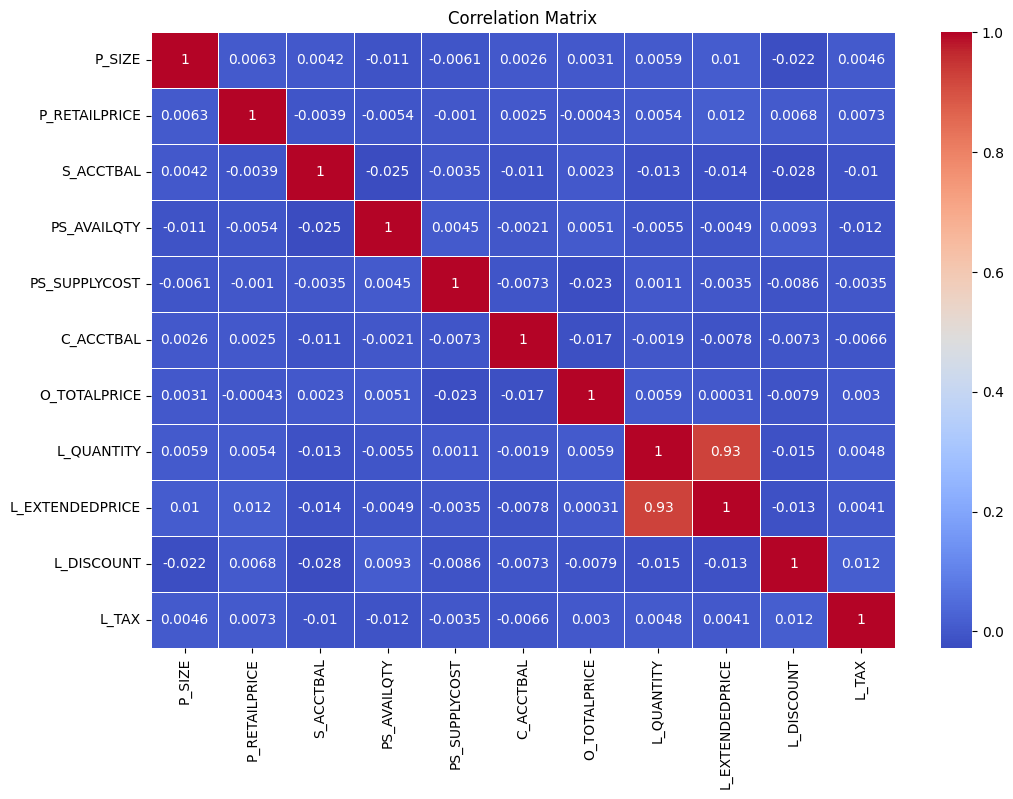

In [24]:

correlation_matrix = df_sampled.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.savefig('../../../data/data_deep_dive/correlations/plots/correlation.png')
plt.show()
